In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

1. Load the dataset into python environment

In [3]:
titanic_df = pd.read_csv('/content/titanic_dataset .csv')


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


2. Make ‘PassengerId’ as the index column

In [6]:
titanic_df.set_index('PassengerId', inplace=True)

3. Check the basic details of the dataset

In [7]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


4. Find and Fill in all the missing values present in all the columns in the dataset

In [12]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

DIFFERENT WAYS TO FILL THE NULL VALUES

In [13]:
titanic_df.Age.skew()

0.38910778230082704

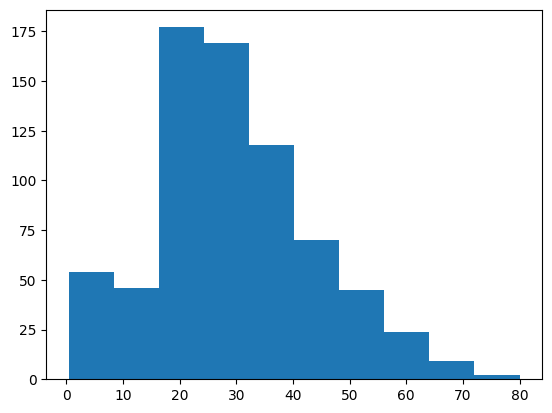

In [14]:
plt.hist(titanic_df['Age'])
plt.show()

In [15]:
# Drop 'Cabin' column
titanic_df.drop(columns=['Cabin'], inplace=True) #I KNOW ITS THE LEAST PREFFERED OPTION. BUT I FIND THIS COLUMN IRREVELENT AND INSUFFICENT CABIN AS THE NULL VALUES ARE SO LARGE
#FILLING THE NULL VALUES OF'EMBARKED' COLUMN WITH MODE
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
#FILLING THE NULL VALUES OF 'AGE' WITH Median VALUE
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [17]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [18]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [19]:
# Dropping unnecessary columns
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [20]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

5. Check and handle outliers in at least 3 columns in the dataset

In [21]:
titanic_df.Age.skew()

0.5102446555756495

In [22]:
titanic_df.Fare.skew()

4.787316519674893

In [23]:
titanic_df.SibSp.skew()

3.6953517271630565

In [24]:
new_columns = ['Age','Fare','SibSp']

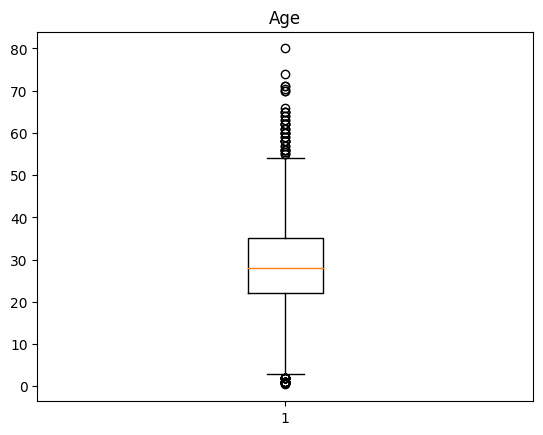

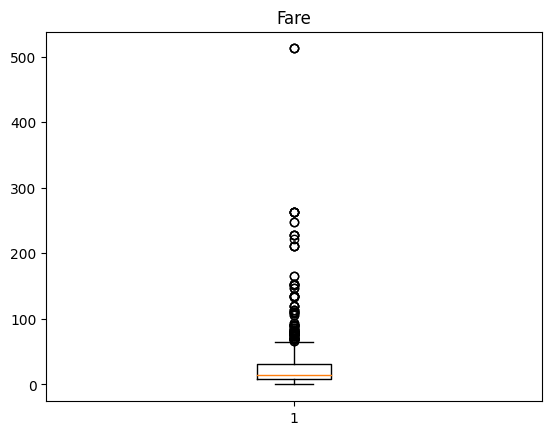

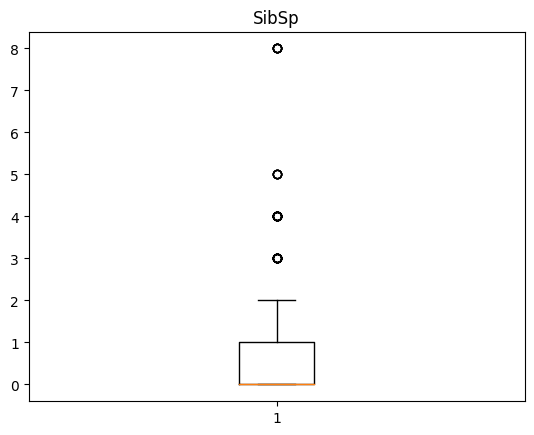

In [25]:
for i in new_columns:
  plt.figure(i)
  plt.boxplot(titanic_df[i])
  plt.title(i);

In [26]:
for j in ['Age','Fare','SibSp']:
    Q1=np.percentile(titanic_df[j],25,method='midpoint')
    Q2=np.percentile(titanic_df[j],50,method='midpoint')
    Q3=np.percentile(titanic_df[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in titanic_df[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    titanic_df[j]=titanic_df[j].clip(lower=low_lim,upper=up_lim)

In [27]:
new_columns2 = ['Age','Fare','SibSp']

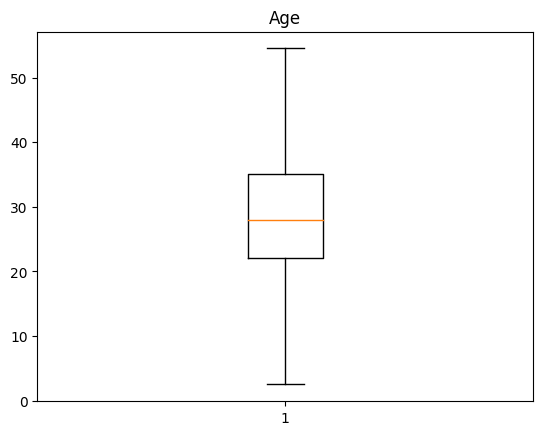

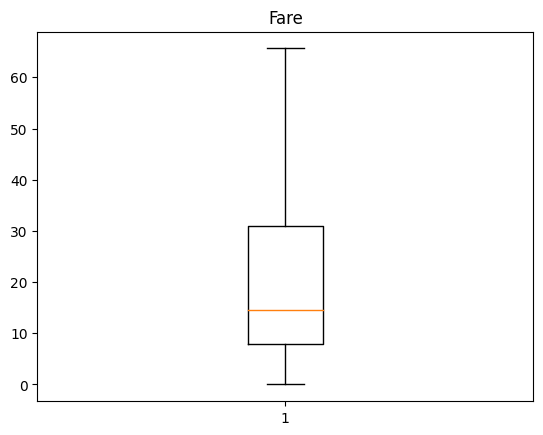

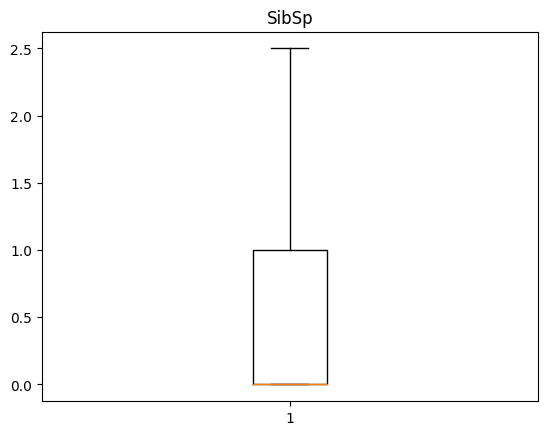

In [28]:
for z in new_columns2:
  plt.figure(z)
  plt.boxplot(titanic_df[z])
  plt.title(z);

In [29]:
# Encoding categorical variables
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

FINDING CORELATION

In [30]:
titanic_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.060622,0.031434,0.081629,0.317430,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.340404,0.023180,0.018443,-0.715300,0.162098
Sex,-0.543351,0.131900,1.000000,0.074740,-0.167885,-0.245489,-0.234969,0.108262
Age,-0.060622,-0.340404,0.074740,1.000000,-0.247806,-0.178959,0.144544,-0.018200
SibSp,0.031434,0.023180,-0.167885,-0.247806,1.000000,0.409366,0.349615,0.038362
Parch,0.081629,0.018443,-0.245489,-0.178959,0.409366,1.000000,0.292616,0.039798
Fare,0.317430,-0.715300,-0.234969,0.144544,0.349615,0.292616,1.000000,-0.199827
Embarked,-0.167675,0.162098,0.108262,-0.018200,0.038362,0.039798,-0.199827,1.000000


<Axes: >

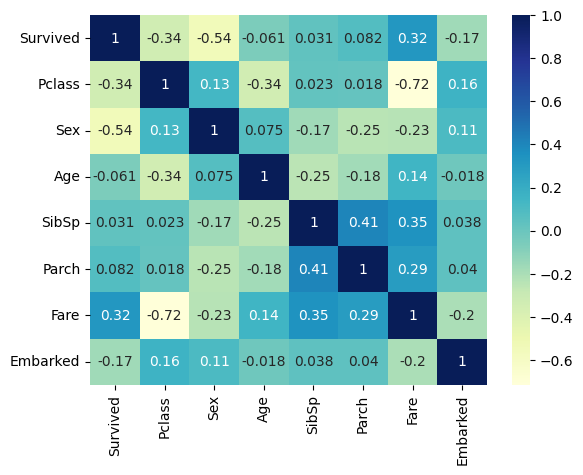

In [31]:
sns.heatmap(titanic_df.corr(),cmap="YlGnBu",annot=True)

GOING FOR CLASSIFICATION PROCESS:- DOING TRAIN_TEST_SPLIT

In [32]:
# Separating features and target variable
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)


In [35]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


KNN AND SVM

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [37]:
from sklearn.metrics import classification_report

1.KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
metric_k = []
neighbors = np.arange(3,15)

In [40]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train_scaled,y_train)
  knn_pred = classifier.predict(X_test_scaled)
  accuracy = accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0.5, 0, 'neighbors')

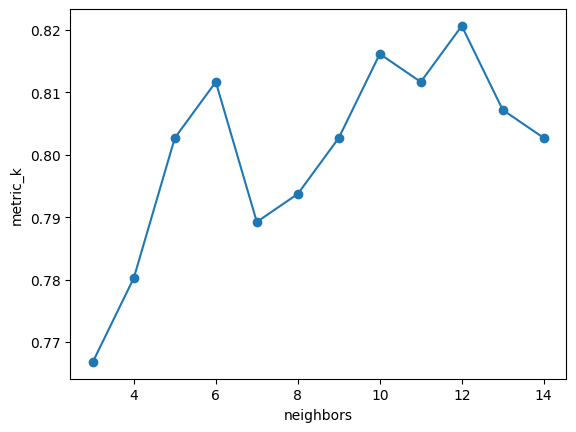

In [41]:
plt.plot(neighbors,metric_k,'o-')
plt.ylabel('metric_k')
plt.xlabel('neighbors')